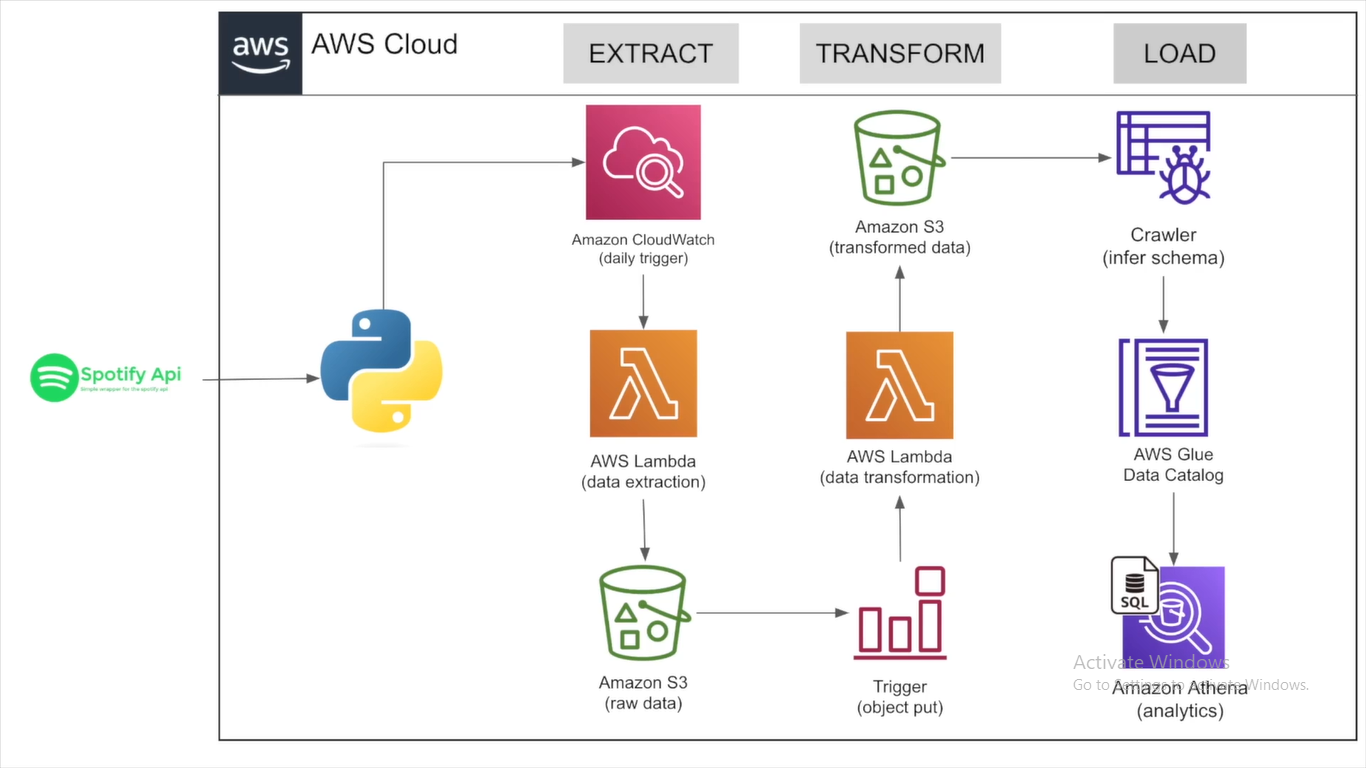

Steps:
1. Collect data from Spotify API.
2. Build and Deploy the code to AWS Lambda.
3. Schedule the run using Amazon CloudWatch trigger.(to run daily, weekly, etc.)
4. AWS Lambda will collect the raw data from spotify API and put it into Amazon S3.
5. Write the transformation code in AWS Lambda.
6. Whenever the raw data comes in Amazon S3 then AWS Lambda will run the transformation code and again store the transformed data in Amazon S3.
7. Now, Glue Crawler will go through the files we got and take the info of how many columns, its datatypes, etc. and pass it to AWS Glue Data Catalog.
8. Final Step, Use Amazon Athena to run SQL on top of the final data for analysis.                 
                                                                                               
NOTE: We can use alternative for AWS Lambda such as Apache AirFlow, or any ETL tool like SnowFlake, etc. to make it more customizable.

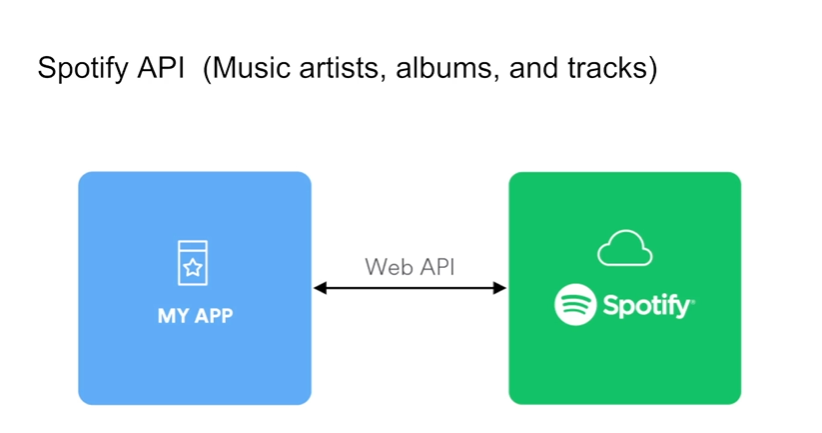

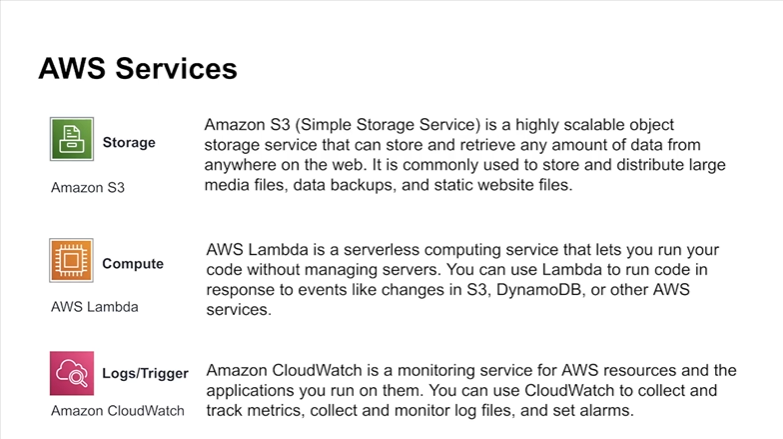

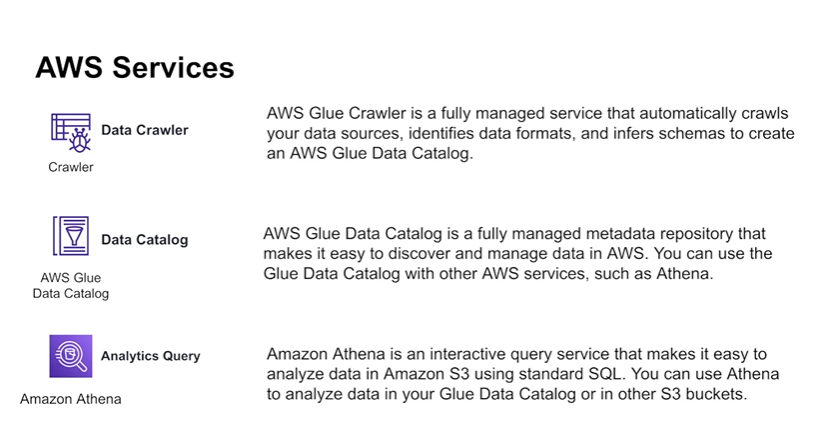

Now, in Step 1, to get the spotify data
visit: https://developer.spotify.com/dashboard

create app inside the dashboard and get the client ID and secret key

![Alt text](image-1.png)

In [2]:
!pip install spotipy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Spotipy Document:                                                                  

https://spotipy.readthedocs.io/en/2.22.1/

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [4]:
#Authenticatiion
ccm = SpotifyClientCredentials(client_id='0f33391797d0426aa3d014dfbfc02879',client_secret='742dd8ec9f17499caaa52d589b205434')

In [5]:
#Authorization
sp = spotipy.Spotify(client_credentials_manager=ccm)

In [6]:
playlist_link = 'https://open.spotify.com/playlist/37i9dQZEVXbMDoHDwVN2tF'


In [7]:
playlist_link.split('/')    #creating list

['https:', '', 'open.spotify.com', 'playlist', '37i9dQZEVXbMDoHDwVN2tF']

In [8]:
playlist_uri = playlist_link.split('/')[-1]
playlist_uri

'37i9dQZEVXbMDoHDwVN2tF'

In [9]:
data = sp.playlist_tracks(playlist_uri)
data    #dictionary

{'href': 'https://api.spotify.com/v1/playlists/37i9dQZEVXbMDoHDwVN2tF/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2023-10-09T08:21:01Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
    'href': 'https://api.spotify.com/v1/users/',
    'id': '',
    'type': 'user',
    'uri': 'spotify:user:'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'},
       'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc',
       'id': '6HaGTQPmzraVmaVxvz6EUc',
       'name': 'Jung Kook',
       'type': 'artist',
       'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'},
       'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ',
       'id': '3MdXrJWsbVzdn6fe5JYkSQ',
    

Dictionary operation

In [10]:
type(data)

dict

In [60]:
# you can't access the dictionary using index number. since, it doesn't have one.

for i in data.keys():
    print(i)

href
items
limit
next
offset
previous
total


In [66]:
for i in data.items():
    print(i)

('href', 'https://api.spotify.com/v1/playlists/37i9dQZEVXbMDoHDwVN2tF/tracks?offset=0&limit=100&additional_types=track')
('items', [{'added_at': '2023-10-09T08:21:01Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'}, 'href': 'https://api.spotify.com/v1/users/', 'id': '', 'type': 'user', 'uri': 'spotify:user:'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'}, 'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc', 'id': '6HaGTQPmzraVmaVxvz6EUc', 'name': 'Jung Kook', 'type': 'artist', 'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'}, 'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ', 'id': '3MdXrJWsbVzdn6fe5JYkSQ', 'name': 'Latto', 'type': 'artist', 'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}], 'availa

In [12]:
len(data)   #have 7 key: value pairs

7

List Operation

In [75]:
# example
l = [1,'a',45,'ef']

print(len(l))
print('-----------')
for i in l:
    print(i)

4
-----------
1
a
45
ef


In [67]:
type(data['items']) #its values is in list format

list

The data is of dictionary, inside it there are lists as well as dictionary.

In [13]:
len(data['items'])  #having 50 list values, top 50 songs

50

In [98]:
data['items'][0]['track']

{'album': {'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'},
    'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc',
    'id': '6HaGTQPmzraVmaVxvz6EUc',
    'name': 'Jung Kook',
    'type': 'artist',
    'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'},
    'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ',
    'id': '3MdXrJWsbVzdn6fe5JYkSQ',
    'name': 'Latto',
    'type': 'artist',
    'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
 

In [69]:
type(data['items'][0]['track'])

dict

In [71]:
type(data['items'][0]['track']['artists'])

list

In [72]:
len(data['items'][0]['track']['artists'])

2

In [73]:
data['items'][0]    #first list value

{'added_at': '2023-10-09T08:21:01Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
  'href': 'https://api.spotify.com/v1/users/',
  'id': '',
  'type': 'user',
  'uri': 'spotify:user:'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'},
     'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc',
     'id': '6HaGTQPmzraVmaVxvz6EUc',
     'name': 'Jung Kook',
     'type': 'artist',
     'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'},
     'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ',
     'id': '3MdXrJWsbVzdn6fe5JYkSQ',
     'name': 'Latto',
     'type': 'artist',
     'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}],
   'available_markets': ['AR',
    'AU',
    'AT',
    'BE',
    'BO',

In [15]:
data['items'][0]['track']

{'album': {'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'},
    'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc',
    'id': '6HaGTQPmzraVmaVxvz6EUc',
    'name': 'Jung Kook',
    'type': 'artist',
    'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'},
    'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ',
    'id': '3MdXrJWsbVzdn6fe5JYkSQ',
    'name': 'Latto',
    'type': 'artist',
    'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
 

In [16]:
data['items'][0]['track']['album']

{'album_type': 'single',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'},
   'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc',
   'id': '6HaGTQPmzraVmaVxvz6EUc',
   'name': 'Jung Kook',
   'type': 'artist',
   'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'},
  {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'},
   'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ',
   'id': '3MdXrJWsbVzdn6fe5JYkSQ',
   'name': 'Latto',
   'type': 'artist',
   'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}],
 'available_markets': ['AR',
  'AU',
  'AT',
  'BE',
  'BO',
  'BR',
  'BG',
  'CA',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DK',
  'DO',
  'DE',
  'EC',
  'EE',
  'SV',
  'FI',
  'FR',
  'GR',
  'GT',
  'HN',
  'HK',
  'HU',
  'IS',
  'IE',
  'IT',
  'LV',
  'LT',
  'LU',
  'MY',
  'MT',
  'MX',
  'NL',
  'NZ',
  'NI',
  'NO',
  'PA',
  'PY',
  'PE',
  'PH',
  'PL',
  'P

In [17]:
data['items'][0]['track']['album']['id']

'53985D8g3JcGBoULSOYYKX'

In [18]:
data['items'][0]['track']['album']['name']

'Seven (feat. Latto)'

In [19]:
data['items'][0]['track']['album']['href']

'https://api.spotify.com/v1/albums/53985D8g3JcGBoULSOYYKX'

In [20]:
data['items'][0]['track']['album']['release_date']

'2023-07-14'

In [21]:
data['items'][0]['track']['album']['total_tracks']

3

In [22]:
data['items'][0]['track']['album']['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'},
  'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc',
  'id': '6HaGTQPmzraVmaVxvz6EUc',
  'name': 'Jung Kook',
  'type': 'artist',
  'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'},
  'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ',
  'id': '3MdXrJWsbVzdn6fe5JYkSQ',
  'name': 'Latto',
  'type': 'artist',
  'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}]

In [23]:
data['items'][0]['track']['album']['external_urls']['spotify']

'https://open.spotify.com/album/53985D8g3JcGBoULSOYYKX'

Creating album list

In [24]:
album_list=[]
for i in data['items']:     #its a list. therefore doing direct access.
    album_id = i['track']['album']['id']    #setting value to a variable
    album_name = i['track']['album']['name']
    album_link = i['track']['album']['href']
    album_release_date = i['track']['album']['release_date']
    album_total_tracks = i['track']['album']['total_tracks']
    album_url = i['track']['album']['external_urls']['spotify']
    #print(album_name)
    #calling these above variables below to form dictionary.
    album_element = {'album_id':album_id,'name':album_name,'link':album_link,'release_date':album_release_date,'total_tracks':album_total_tracks,'url':album_url}
    #inserting above dictionary in a list
    album_list.append(album_element)    #inserting into list
    print(i)

{'added_at': '2023-10-09T08:21:01Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'}, 'href': 'https://api.spotify.com/v1/users/', 'id': '', 'type': 'user', 'uri': 'spotify:user:'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'}, 'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc', 'id': '6HaGTQPmzraVmaVxvz6EUc', 'name': 'Jung Kook', 'type': 'artist', 'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'}, 'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ', 'id': '3MdXrJWsbVzdn6fe5JYkSQ', 'name': 'Latto', 'type': 'artist', 'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI

In [25]:
album_list

[{'album_id': '53985D8g3JcGBoULSOYYKX',
  'name': 'Seven (feat. Latto)',
  'link': 'https://api.spotify.com/v1/albums/53985D8g3JcGBoULSOYYKX',
  'release_date': '2023-07-14',
  'total_tracks': 3,
  'url': 'https://open.spotify.com/album/53985D8g3JcGBoULSOYYKX'},
 {'album_id': '1bBez9PNvkJPW08bU7NYta',
  'name': 'Scarlet',
  'link': 'https://api.spotify.com/v1/albums/1bBez9PNvkJPW08bU7NYta',
  'release_date': '2023-09-20',
  'total_tracks': 15,
  'url': 'https://open.spotify.com/album/1bBez9PNvkJPW08bU7NYta'},
 {'album_id': '0fJ0beklzFwoBv01U8792s',
  'name': '3D : The Remixes',
  'link': 'https://api.spotify.com/v1/albums/0fJ0beklzFwoBv01U8792s',
  'release_date': '2023-10-02',
  'total_tracks': 7,
  'url': 'https://open.spotify.com/album/0fJ0beklzFwoBv01U8792s'},
 {'album_id': '3UOV8XvCwMKaATRNXrYCjN',
  'name': 'greedy',
  'link': 'https://api.spotify.com/v1/albums/3UOV8XvCwMKaATRNXrYCjN',
  'release_date': '2023-09-15',
  'total_tracks': 1,
  'url': 'https://open.spotify.com/album/3

In [26]:
type(album_list)

list

In [29]:
for i in data['items']: #iterating the list
    for key,value in i.items(): #inside of list are dictionary.
        if key == 'track':
            print(value)

{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'}, 'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc', 'id': '6HaGTQPmzraVmaVxvz6EUc', 'name': 'Jung Kook', 'type': 'artist', 'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'}, 'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ', 'id': '3MdXrJWsbVzdn6fe5JYkSQ', 'name': 'Latto', 'type': 'artist', 'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 

In [78]:
for i in data['items']:
    for key,value in i.items():
        if key == 'track':
            print(value['artists']) #getting list
          

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'}, 'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc', 'id': '6HaGTQPmzraVmaVxvz6EUc', 'name': 'Jung Kook', 'type': 'artist', 'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'}, 'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ', 'id': '3MdXrJWsbVzdn6fe5JYkSQ', 'name': 'Latto', 'type': 'artist', 'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}]
[{'external_urls': {'spotify': 'https://open.spotify.com/artist/5cj0lLjcoR7YOSnhnX0Po5'}, 'href': 'https://api.spotify.com/v1/artists/5cj0lLjcoR7YOSnhnX0Po5', 'id': '5cj0lLjcoR7YOSnhnX0Po5', 'name': 'Doja Cat', 'type': 'artist', 'uri': 'spotify:artist:5cj0lLjcoR7YOSnhnX0Po5'}]
[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'}, 'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc', 'id': '6Ha

In [79]:
for i in data['items']:
    for key,value in i.items():
        if key == 'track':
            for j in value['artists']:  #getting dictionary
                print(j)
                

{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'}, 'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc', 'id': '6HaGTQPmzraVmaVxvz6EUc', 'name': 'Jung Kook', 'type': 'artist', 'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'}
{'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'}, 'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ', 'id': '3MdXrJWsbVzdn6fe5JYkSQ', 'name': 'Latto', 'type': 'artist', 'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}
{'external_urls': {'spotify': 'https://open.spotify.com/artist/5cj0lLjcoR7YOSnhnX0Po5'}, 'href': 'https://api.spotify.com/v1/artists/5cj0lLjcoR7YOSnhnX0Po5', 'id': '5cj0lLjcoR7YOSnhnX0Po5', 'name': 'Doja Cat', 'type': 'artist', 'uri': 'spotify:artist:5cj0lLjcoR7YOSnhnX0Po5'}
{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'}, 'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc', 'id': '6HaGTQPmz

Creating artist list

In [80]:
#to get artist details
data['items'][0]

{'added_at': '2023-10-09T08:21:01Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
  'href': 'https://api.spotify.com/v1/users/',
  'id': '',
  'type': 'user',
  'uri': 'spotify:user:'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'},
     'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc',
     'id': '6HaGTQPmzraVmaVxvz6EUc',
     'name': 'Jung Kook',
     'type': 'artist',
     'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'},
     'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ',
     'id': '3MdXrJWsbVzdn6fe5JYkSQ',
     'name': 'Latto',
     'type': 'artist',
     'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}],
   'available_markets': ['AR',
    'AU',
    'AT',
    'BE',
    'BO',

In [82]:
data['items'][0]['track']['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'},
  'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc',
  'id': '6HaGTQPmzraVmaVxvz6EUc',
  'name': 'Jung Kook',
  'type': 'artist',
  'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'},
  'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ',
  'id': '3MdXrJWsbVzdn6fe5JYkSQ',
  'name': 'Latto',
  'type': 'artist',
  'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}]

In [84]:
data['items'][0]['track']['artists'][0]['external_urls']

{'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'}

In [85]:
data['items'][0]['track']['artists'][0]['id']

'6HaGTQPmzraVmaVxvz6EUc'

In [88]:
data['items'][0]['track']['artists'][0]['name']

'Jung Kook'

In [89]:
data['items'][0]['track']['artists'][0]['href']

'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc'

In [90]:
data['items'][0]['track']

{'album': {'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'},
    'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc',
    'id': '6HaGTQPmzraVmaVxvz6EUc',
    'name': 'Jung Kook',
    'type': 'artist',
    'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'},
    'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ',
    'id': '3MdXrJWsbVzdn6fe5JYkSQ',
    'name': 'Latto',
    'type': 'artist',
    'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
 

In [91]:
data['items'][0]['track']['available_markets']

['AR',
 'AU',
 'AT',
 'BE',
 'BO',
 'BR',
 'BG',
 'CA',
 'CL',
 'CO',
 'CR',
 'CY',
 'CZ',
 'DK',
 'DO',
 'DE',
 'EC',
 'EE',
 'SV',
 'FI',
 'FR',
 'GR',
 'GT',
 'HN',
 'HK',
 'HU',
 'IS',
 'IE',
 'IT',
 'LV',
 'LT',
 'LU',
 'MY',
 'MT',
 'MX',
 'NL',
 'NZ',
 'NI',
 'NO',
 'PA',
 'PY',
 'PE',
 'PH',
 'PL',
 'PT',
 'SG',
 'SK',
 'ES',
 'SE',
 'CH',
 'TW',
 'TR',
 'UY',
 'US',
 'GB',
 'AD',
 'LI',
 'MC',
 'ID',
 'JP',
 'TH',
 'VN',
 'RO',
 'IL',
 'ZA',
 'SA',
 'AE',
 'BH',
 'QA',
 'OM',
 'KW',
 'EG',
 'MA',
 'DZ',
 'TN',
 'LB',
 'JO',
 'PS',
 'IN',
 'BY',
 'KZ',
 'MD',
 'UA',
 'AL',
 'BA',
 'HR',
 'ME',
 'MK',
 'RS',
 'SI',
 'KR',
 'BD',
 'PK',
 'LK',
 'GH',
 'KE',
 'NG',
 'TZ',
 'UG',
 'AG',
 'AM',
 'BS',
 'BB',
 'BZ',
 'BT',
 'BW',
 'BF',
 'CV',
 'CW',
 'DM',
 'FJ',
 'GM',
 'GE',
 'GD',
 'GW',
 'GY',
 'HT',
 'JM',
 'KI',
 'LS',
 'LR',
 'MW',
 'MV',
 'ML',
 'MH',
 'FM',
 'NA',
 'NR',
 'NE',
 'PW',
 'PG',
 'WS',
 'SM',
 'ST',
 'SN',
 'SC',
 'SL',
 'SB',
 'KN',
 'LC',
 'VC',
 'SR',
 'TL',

In [93]:
artist_list = []
album_type_list = []
for i in data['items']:     #list having dictionary values
    for key,value in i.items():     #getting key and its value of each iteration
        # print(key,'---------',value)
        # print('============================')
        if key == 'track':
            for k in value['available_markets']:
                d = {'available_market':k}
                album_type_list.append(d)
            for j in value['artists']:  #getting dictionary
                artist_dict = {'artist_id':j['id'],'artist_name':j['name'],'external_urls':j['href']}   #accessing value using key
                artist_list.append(artist_dict)

In [39]:
album_type_list

[{'available_market': 'AR'},
 {'available_market': 'AU'},
 {'available_market': 'AT'},
 {'available_market': 'BE'},
 {'available_market': 'BO'},
 {'available_market': 'BR'},
 {'available_market': 'BG'},
 {'available_market': 'CA'},
 {'available_market': 'CL'},
 {'available_market': 'CO'},
 {'available_market': 'CR'},
 {'available_market': 'CY'},
 {'available_market': 'CZ'},
 {'available_market': 'DK'},
 {'available_market': 'DO'},
 {'available_market': 'DE'},
 {'available_market': 'EC'},
 {'available_market': 'EE'},
 {'available_market': 'SV'},
 {'available_market': 'FI'},
 {'available_market': 'FR'},
 {'available_market': 'GR'},
 {'available_market': 'GT'},
 {'available_market': 'HN'},
 {'available_market': 'HK'},
 {'available_market': 'HU'},
 {'available_market': 'IS'},
 {'available_market': 'IE'},
 {'available_market': 'IT'},
 {'available_market': 'LV'},
 {'available_market': 'LT'},
 {'available_market': 'LU'},
 {'available_market': 'MY'},
 {'available_market': 'MT'},
 {'available_m

In [40]:
artist_list

[{'artist_id': '6HaGTQPmzraVmaVxvz6EUc',
  'artist_name': 'Jung Kook',
  'external_urls': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc'},
 {'artist_id': '3MdXrJWsbVzdn6fe5JYkSQ',
  'artist_name': 'Latto',
  'external_urls': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ'},
 {'artist_id': '5cj0lLjcoR7YOSnhnX0Po5',
  'artist_name': 'Doja Cat',
  'external_urls': 'https://api.spotify.com/v1/artists/5cj0lLjcoR7YOSnhnX0Po5'},
 {'artist_id': '6HaGTQPmzraVmaVxvz6EUc',
  'artist_name': 'Jung Kook',
  'external_urls': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc'},
 {'artist_id': '2LIk90788K0zvyj2JJVwkJ',
  'artist_name': 'Jack Harlow',
  'external_urls': 'https://api.spotify.com/v1/artists/2LIk90788K0zvyj2JJVwkJ'},
 {'artist_id': '45dkTj5sMRSjrmBSBeiHym',
  'artist_name': 'Tate McRae',
  'external_urls': 'https://api.spotify.com/v1/artists/45dkTj5sMRSjrmBSBeiHym'},
 {'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake',
  'external_urls': 'htt

In [41]:
# creating DataFrame
album_df = pd.DataFrame.from_dict(album_list)   # converting dictionary to DataFrame
# pd.DataFrame.to_dict will convert the DataFrame to dictionary
album_df.head()

,album_id,name,link,release_date,total_tracks,url
0,53985D8g3JcGBoULSOYYKX,Seven (feat. Latto),https://api.spotify.com/v1/albums/53985D8g3JcG...,2023-07-14,3,https://open.spotify.com/album/53985D8g3JcGBoU...
1,1bBez9PNvkJPW08bU7NYta,Scarlet,https://api.spotify.com/v1/albums/1bBez9PNvkJP...,2023-09-20,15,https://open.spotify.com/album/1bBez9PNvkJPW08...
2,0fJ0beklzFwoBv01U8792s,3D : The Remixes,https://api.spotify.com/v1/albums/0fJ0beklzFwo...,2023-10-02,7,https://open.spotify.com/album/0fJ0beklzFwoBv0...
3,3UOV8XvCwMKaATRNXrYCjN,greedy,https://api.spotify.com/v1/albums/3UOV8XvCwMKa...,2023-09-15,1,https://open.spotify.com/album/3UOV8XvCwMKaATR...
4,4czdORdCWP9umpbhFXK2fW,For All The Dogs,https://api.spotify.com/v1/albums/4czdORdCWP9u...,2023-10-06,23,https://open.spotify.com/album/4czdORdCWP9umpb...


In [108]:
album_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   album_id      50 non-null     object        
 1   name          50 non-null     object        
 2   link          50 non-null     object        
 3   release_date  50 non-null     datetime64[ns]
 4   total_tracks  50 non-null     int64         
 5   url           50 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.5+ KB


In [107]:
# creating DataFrame
artist_df = pd.DataFrame.from_dict(artist_list)   # converting dictionary to DataFrame
# pd.DataFrame.to_dict will convert the DataFrame to dictionary
artist_df.head()

,artist_id,artist_name,external_urls
0,6HaGTQPmzraVmaVxvz6EUc,Jung Kook,https://api.spotify.com/v1/artists/6HaGTQPmzra...
1,3MdXrJWsbVzdn6fe5JYkSQ,Latto,https://api.spotify.com/v1/artists/3MdXrJWsbVz...
2,5cj0lLjcoR7YOSnhnX0Po5,Doja Cat,https://api.spotify.com/v1/artists/5cj0lLjcoR7...
3,6HaGTQPmzraVmaVxvz6EUc,Jung Kook,https://api.spotify.com/v1/artists/6HaGTQPmzra...
4,2LIk90788K0zvyj2JJVwkJ,Jack Harlow,https://api.spotify.com/v1/artists/2LIk90788K0...


In [109]:
artist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   artist_id      75 non-null     object
 1   artist_name    75 non-null     object
 2   external_urls  75 non-null     object
dtypes: object(3)
memory usage: 1.9+ KB


In [43]:
album_df['release_date'] = pd.to_datetime(album_df['release_date'])

In [44]:
album_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   album_id      50 non-null     object        
 1   name          50 non-null     object        
 2   link          50 non-null     object        
 3   release_date  50 non-null     datetime64[ns]
 4   total_tracks  50 non-null     int64         
 5   url           50 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.5+ KB


In [45]:
type(album_df)

pandas.core.frame.DataFrame

In [111]:
album_df.head()

,album_id,name,link,release_date,total_tracks,url
0,53985D8g3JcGBoULSOYYKX,Seven (feat. Latto),https://api.spotify.com/v1/albums/53985D8g3JcG...,2023-07-14,3,https://open.spotify.com/album/53985D8g3JcGBoU...
1,1bBez9PNvkJPW08bU7NYta,Scarlet,https://api.spotify.com/v1/albums/1bBez9PNvkJP...,2023-09-20,15,https://open.spotify.com/album/1bBez9PNvkJPW08...
2,0fJ0beklzFwoBv01U8792s,3D : The Remixes,https://api.spotify.com/v1/albums/0fJ0beklzFwo...,2023-10-02,7,https://open.spotify.com/album/0fJ0beklzFwoBv0...
3,3UOV8XvCwMKaATRNXrYCjN,greedy,https://api.spotify.com/v1/albums/3UOV8XvCwMKa...,2023-09-15,1,https://open.spotify.com/album/3UOV8XvCwMKaATR...
4,4czdORdCWP9umpbhFXK2fW,For All The Dogs,https://api.spotify.com/v1/albums/4czdORdCWP9u...,2023-10-06,23,https://open.spotify.com/album/4czdORdCWP9umpb...


Creating song list

In [105]:
data['items'][0]

{'added_at': '2023-10-09T08:21:01Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
  'href': 'https://api.spotify.com/v1/users/',
  'id': '',
  'type': 'user',
  'uri': 'spotify:user:'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'},
     'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc',
     'id': '6HaGTQPmzraVmaVxvz6EUc',
     'name': 'Jung Kook',
     'type': 'artist',
     'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'},
     'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ',
     'id': '3MdXrJWsbVzdn6fe5JYkSQ',
     'name': 'Latto',
     'type': 'artist',
     'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}],
   'available_markets': ['AR',
    'AU',
    'AT',
    'BE',
    'BO',

In [97]:
data['items'][0]['track']

{'album': {'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'},
    'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc',
    'id': '6HaGTQPmzraVmaVxvz6EUc',
    'name': 'Jung Kook',
    'type': 'artist',
    'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'},
    'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ',
    'id': '3MdXrJWsbVzdn6fe5JYkSQ',
    'name': 'Latto',
    'type': 'artist',
    'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
 

In [99]:
data['items'][0]['track']['id']

'7x9aauaA9cu6tyfpHnqDLo'

In [100]:
data['items'][0]['track']['name']

'Seven (feat. Latto) (Explicit Ver.)'

In [101]:
data['items'][0]['track']['duration_ms']

184400

In [102]:
data['items'][0]['track']['external_urls']['spotify']

'https://open.spotify.com/track/7x9aauaA9cu6tyfpHnqDLo'

In [103]:
data['items'][0]['track']['popularity']

97

In [104]:
data['items'][0]['added_at']

'2023-10-09T08:21:01Z'

In [106]:
data['items'][0]['track']['album']['id']

'53985D8g3JcGBoULSOYYKX'

In [47]:
song_list = []
for row in data['items']:
    song_id = row['track']['id']
    song_name = row['track']['name']
    song_duration = row['track']['duration_ms']
    song_url = row['track']['external_urls']['spotify']
    song_popularity = row['track']['popularity']
    song_added = row['added_at']
    album_id = row['track']['album']['id']
    artist_id = row['track']['album']['artists'][0]['id']
    
    song_element = {'song_id':song_id,'song_name':song_name,'song_duration':song_duration,'song_url':song_url,'song_popularity':song_popularity,'song_added':song_added,'album_id':album_id,'artist_id':artist_id} #creating dictionary to store all the above variable values.
    
    song_list.append(song_element)


In [48]:
len(song_list)

50

In [49]:
song_list

[{'song_id': '7x9aauaA9cu6tyfpHnqDLo',
  'song_name': 'Seven (feat. Latto) (Explicit Ver.)',
  'song_duration': 184400,
  'song_url': 'https://open.spotify.com/track/7x9aauaA9cu6tyfpHnqDLo',
  'song_popularity': 97,
  'song_added': '2023-10-09T08:21:01Z',
  'album_id': '53985D8g3JcGBoULSOYYKX',
  'artist_id': '6HaGTQPmzraVmaVxvz6EUc'},
 {'song_id': '56y1jOTK0XSvJzVv9vHQBK',
  'song_name': 'Paint The Town Red',
  'song_duration': 230480,
  'song_url': 'https://open.spotify.com/track/56y1jOTK0XSvJzVv9vHQBK',
  'song_popularity': 84,
  'song_added': '2023-10-09T08:21:01Z',
  'album_id': '1bBez9PNvkJPW08bU7NYta',
  'artist_id': '5cj0lLjcoR7YOSnhnX0Po5'},
 {'song_id': '01qFKNWq73UfEslI0GvumE',
  'song_name': '3D (feat. Jack Harlow)',
  'song_duration': 201812,
  'song_url': 'https://open.spotify.com/track/01qFKNWq73UfEslI0GvumE',
  'song_popularity': 82,
  'song_added': '2023-10-09T08:21:01Z',
  'album_id': '0fJ0beklzFwoBv01U8792s',
  'artist_id': '6HaGTQPmzraVmaVxvz6EUc'},
 {'song_id': '3r

In [50]:
song_df = pd.DataFrame.from_dict(song_list)
song_df

,song_id,song_name,song_duration,song_url,song_popularity,song_added,album_id,artist_id
0,7x9aauaA9cu6tyfpHnqDLo,Seven (feat. Latto) (Explicit Ver.),184400,https://open.spotify.com/track/7x9aauaA9cu6tyf...,97,2023-10-09T08:21:01Z,53985D8g3JcGBoULSOYYKX,6HaGTQPmzraVmaVxvz6EUc
1,56y1jOTK0XSvJzVv9vHQBK,Paint The Town Red,230480,https://open.spotify.com/track/56y1jOTK0XSvJzV...,84,2023-10-09T08:21:01Z,1bBez9PNvkJPW08bU7NYta,5cj0lLjcoR7YOSnhnX0Po5
2,01qFKNWq73UfEslI0GvumE,3D (feat. Jack Harlow),201812,https://open.spotify.com/track/01qFKNWq73UfEsl...,82,2023-10-09T08:21:01Z,0fJ0beklzFwoBv01U8792s,6HaGTQPmzraVmaVxvz6EUc
3,3rUGC1vUpkDG9CZFHMur1t,greedy,131872,https://open.spotify.com/track/3rUGC1vUpkDG9CZ...,95,2023-10-09T08:21:01Z,3UOV8XvCwMKaATRNXrYCjN,45dkTj5sMRSjrmBSBeiHym
4,7aqfrAY2p9BUSiupwk3svU,First Person Shooter (feat. J. Cole),247444,https://open.spotify.com/track/7aqfrAY2p9BUSiu...,81,2023-10-09T08:21:01Z,4czdORdCWP9umpbhFXK2fW,3TVXtAsR1Inumwj472S9r4
5,2YSzYUF3jWqb9YP9VXmpjE,IDGAF (feat. Yeat),260111,https://open.spotify.com/track/2YSzYUF3jWqb9YP...,80,2023-10-09T08:21:01Z,4czdORdCWP9umpbhFXK2fW,3TVXtAsR1Inumwj472S9r4
6,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,178426,https://open.spotify.com/track/1BxfuPKGuaTgP7a...,99,2023-10-09T08:21:01Z,1NAmidJlEaVgA3MpcPFYGq,06HL4z0CvFAxyc27GXpf02
7,5mjYQaktjmjcMKcUIcqz4s,Strangers,172964,https://open.spotify.com/track/5mjYQaktjmjcMKc...,96,2023-10-09T08:21:01Z,18ogtNq9F7DmMkNYO6Xb4k,7uMDnSZyUYNBPLhPMNuaM2
8,2HafqoJbgXdtjwCOvNEF14,Si No Estás,184061,https://open.spotify.com/track/2HafqoJbgXdtjwC...,90,2023-10-09T08:21:01Z,66k6EGkPtYoN44anGIsEPW,0jbo7KFNMiIkfBR6ih0yhm
9,5RqSsdzTNPX1uzkmlHCFvK,QLONA,172797,https://open.spotify.com/track/5RqSsdzTNPX1uzk...,93,2023-10-09T08:21:01Z,0FqAaUEyKCyUNFE1uQPZ7i,790FomKkXshlbRYZFtlgla


In [51]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   song_id          50 non-null     object
 1   song_name        50 non-null     object
 2   song_duration    50 non-null     int64 
 3   song_url         50 non-null     object
 4   song_popularity  50 non-null     int64 
 5   song_added       50 non-null     object
 6   album_id         50 non-null     object
 7   artist_id        50 non-null     object
dtypes: int64(2), object(6)
memory usage: 3.2+ KB


In [52]:
song_df['song_added'] = pd.to_datetime(song_df['song_added'])

In [53]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   song_id          50 non-null     object             
 1   song_name        50 non-null     object             
 2   song_duration    50 non-null     int64              
 3   song_url         50 non-null     object             
 4   song_popularity  50 non-null     int64              
 5   song_added       50 non-null     datetime64[ns, UTC]
 6   album_id         50 non-null     object             
 7   artist_id        50 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 3.2+ KB


In [54]:
song_df

,song_id,song_name,song_duration,song_url,song_popularity,song_added,album_id,artist_id
0,7x9aauaA9cu6tyfpHnqDLo,Seven (feat. Latto) (Explicit Ver.),184400,https://open.spotify.com/track/7x9aauaA9cu6tyf...,97,2023-10-09 08:21:01+00:00,53985D8g3JcGBoULSOYYKX,6HaGTQPmzraVmaVxvz6EUc
1,56y1jOTK0XSvJzVv9vHQBK,Paint The Town Red,230480,https://open.spotify.com/track/56y1jOTK0XSvJzV...,84,2023-10-09 08:21:01+00:00,1bBez9PNvkJPW08bU7NYta,5cj0lLjcoR7YOSnhnX0Po5
2,01qFKNWq73UfEslI0GvumE,3D (feat. Jack Harlow),201812,https://open.spotify.com/track/01qFKNWq73UfEsl...,82,2023-10-09 08:21:01+00:00,0fJ0beklzFwoBv01U8792s,6HaGTQPmzraVmaVxvz6EUc
3,3rUGC1vUpkDG9CZFHMur1t,greedy,131872,https://open.spotify.com/track/3rUGC1vUpkDG9CZ...,95,2023-10-09 08:21:01+00:00,3UOV8XvCwMKaATRNXrYCjN,45dkTj5sMRSjrmBSBeiHym
4,7aqfrAY2p9BUSiupwk3svU,First Person Shooter (feat. J. Cole),247444,https://open.spotify.com/track/7aqfrAY2p9BUSiu...,81,2023-10-09 08:21:01+00:00,4czdORdCWP9umpbhFXK2fW,3TVXtAsR1Inumwj472S9r4
5,2YSzYUF3jWqb9YP9VXmpjE,IDGAF (feat. Yeat),260111,https://open.spotify.com/track/2YSzYUF3jWqb9YP...,80,2023-10-09 08:21:01+00:00,4czdORdCWP9umpbhFXK2fW,3TVXtAsR1Inumwj472S9r4
6,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,178426,https://open.spotify.com/track/1BxfuPKGuaTgP7a...,99,2023-10-09 08:21:01+00:00,1NAmidJlEaVgA3MpcPFYGq,06HL4z0CvFAxyc27GXpf02
7,5mjYQaktjmjcMKcUIcqz4s,Strangers,172964,https://open.spotify.com/track/5mjYQaktjmjcMKc...,96,2023-10-09 08:21:01+00:00,18ogtNq9F7DmMkNYO6Xb4k,7uMDnSZyUYNBPLhPMNuaM2
8,2HafqoJbgXdtjwCOvNEF14,Si No Estás,184061,https://open.spotify.com/track/2HafqoJbgXdtjwC...,90,2023-10-09 08:21:01+00:00,66k6EGkPtYoN44anGIsEPW,0jbo7KFNMiIkfBR6ih0yhm
9,5RqSsdzTNPX1uzkmlHCFvK,QLONA,172797,https://open.spotify.com/track/5RqSsdzTNPX1uzk...,93,2023-10-09 08:21:01+00:00,0FqAaUEyKCyUNFE1uQPZ7i,790FomKkXshlbRYZFtlgla


In [55]:
song_df['song_added']

0    2023-10-09 08:21:01+00:00
1    2023-10-09 08:21:01+00:00
2    2023-10-09 08:21:01+00:00
3    2023-10-09 08:21:01+00:00
4    2023-10-09 08:21:01+00:00
5    2023-10-09 08:21:01+00:00
6    2023-10-09 08:21:01+00:00
7    2023-10-09 08:21:01+00:00
8    2023-10-09 08:21:01+00:00
9    2023-10-09 08:21:01+00:00
10   2023-10-09 08:21:01+00:00
11   2023-10-09 08:21:01+00:00
12   2023-10-09 08:21:01+00:00
13   2023-10-09 08:21:01+00:00
14   2023-10-09 08:21:01+00:00
15   2023-10-09 08:21:01+00:00
16   2023-10-09 08:21:01+00:00
17   2023-10-09 08:21:01+00:00
18   2023-10-09 08:21:01+00:00
19   2023-10-09 08:21:01+00:00
20   2023-10-09 08:21:01+00:00
21   2023-10-09 08:21:01+00:00
22   2023-10-09 08:21:01+00:00
23   2023-10-09 08:21:01+00:00
24   2023-10-09 08:21:01+00:00
25   2023-10-09 08:21:01+00:00
26   2023-10-09 08:21:01+00:00
27   2023-10-09 08:21:01+00:00
28   2023-10-09 08:21:01+00:00
29   2023-10-09 08:21:01+00:00
30   2023-10-09 08:21:01+00:00
31   2023-10-09 08:21:01+00:00
32   202

In [56]:
song_list[0]['song_added']

'2023-10-09T08:21:01Z'

Creating an AWS Account                                       
1. Go to: https://aws.amazon.com/
2. click on create account or sign-in to your account.
3. Once the account is created, there are two types of users i.e root and different user.
4. In order to keep your aws account safe from hackers don't use root user instead create another user inside it.
5. now, to create user, search for IAM inside console search bar, click on users, create user.
6. you will get access key, secret key it should not be licked online, so aws will show access key only for once, we can create another access key in our next visit.

To create Bill Alert                                 
1. select location as N. Virginia
2. click on Billing Dashboard inside username tab
3. click on Billing Preferences, check on Recieve Billing Alerts
4. Now, search for cloudwatch
5. go to Alarms, click on Billing, create alarm button, select metric, billing option, Total Estimated Charge,  click on USD, select metric, give ur comfortable charge below eg. $3, NEXT, create new topic, enter name, email to receive exess usage alert, create topic, NEXT, add same name, NEXT, Create Alarm.


Creating S3 bucket                              
1. search for s3, create bucket, add unique global name, Create Bucket
2. select your created bucket, create folder, add name as raw_data, Create Folder
3. create one more folder, add name as transformed_data, Create Folder
4. inside raw_data folder, create two other folders i.e to_processed, processed
5. inside transformed_data, create three folders, album_data, songs_data, artist_data


Creating Lambda                          
1. search for lambda, create a function, add name spotify_api_data_extract, runtime Python 3.10 as we installed in pc, click on create function.

In [57]:
# python version
import sys

print(sys.version)

3.10.8 (tags/v3.10.8:aaaf517, Oct 11 2022, 16:50:30) [MSC v.1933 64 bit (AMD64)]


Setting Environment Variables                   
1. click on Configuration, Environment Variables, Add, give your custom two variable names client_id, client_secret... so that it will be saved in backend and cannot be accessed in public.

Now start writing our code in Lambda                                    
1. after writing the code, do deploy, then test.


Inserting spotipy package manually                       
1. since spotipy is not installed in aws, after getting error, go to lambda in new tab, click on layers, add spotipy manual zip file, click on x86_64, select runtime Python 3.10, Create.
2. now go to ur function, scroll down click on add layer, custom layer, select ur created layer, add layer.

Importing boto3 package                   
1. boto3 is a inbuilt package created by aws, used to communicate with aws services.
2. we want to dumb the entire json from lambda to S3 i.e we are using boto3 package.

Removing the time out error                    
1. in your aws code, go to configuration, general configuration, edit, put 1min 30sec, Save.

Removing Access Denied Error.                                                        
NOTE: when two services in AWS wants to communicate with each other, we have to set IAM (Identity Access Management) role.
1. Go to Function, select your function, Configuration, Permissions, click on the role link, click on Add Permission button, Attach Policies, Search S3, check on AmazonS3FullAccess, save.
2. Test your code it will run successfully.

Create new function for transformed data                    
1. go to Function, create new function, author from scratch, add name spotify_transformed_load_function , runtime, x86_64, change default role, existing role, select the role of current project mentioned in it, create function.

To import pandas in AWS               
1. add layer , AWS layers , AWSSDKPandas-Py , version 3 , Add button.

To add trigger for raw data:             
select your function in lambda, click on add trigger, select EventBridge (CloudWatch event), Create a new rule, enter rule name: every_1_minute, Schedule expression: rate(1 minute), click on add.

To add trigger for spotify_transformation_load_function:             
select your function in lambda, click on add trigger, select s3, select your bucket name, event type: All object create events, prefix: raw_data/to_processed/, suffix: .json,  click on add.

Give lambdarole permission:                  
go to spotify_transformation_load_function, scroll down, configuration, permissions, click on role name, add permission button, attach policies, add AWSlambdarole, add. 

Deleting the EventBridge (CloudWatch event) trigger:                     
since we have made it for testing purpose and its creating data for each minute which will make our s3 full.

Before going for Glue, first delete all the files in all folders.

AWS Glue:                                    
1. search for aws glue in aws search bar and click on it, got to crawlers, create crawler, enter name: spotify_songs_crawler, NEXT, select option "Not yet", add data source, browse s3, go to s3://spotify-etl-project-tushar27/transformed_data/songs_data/, (put / as suffix if its not there to path), choose, add an S3 data source button, next, create IAM role, give suffix name '-spotify-s3-glue-role', create, next, select target database if db is not present then ,add database, enter name: spotify_db, create database, go back and select target database, next, create crawler, now click on run crawler,sub-refresh button in page, wait for ready status for few seconds.  

Athena:                                            
1. search for athena in aws search, click on launch using Trino SQL, select our created database, now preview your table you will get all the data in a table.

Now, repeat the procedure to create crawler for album and artist same as song.

Sometimes in athena, column names are not detacted so...
1. Go to crawler, click on tables, open your required table, click on Edit schema as JSON, now update the table name manually, click on "Save as new table version".
2. click on "advanced properties", in top right corner: Action, Edit table, Table properties, Add, unique key: skip.head.line.count and value=1, add.
3. now, after applying above, go to athena and click on preview your table to see the output of data.

NOTE: If multiple tables are created using Crawler then check whether the schemas are same or not. it requires same schema with same columns count and its names of all files to create single table or it will create different table for different files.

Technical Working:                                                                    
1. Extracting data from spotify API using lambda function and storing it in S3 into "to_processed" folder.
2. applying trigger to fetch data from "to_processed" folder and storing it into three different folders using again different code in lambda function.
3. And copying files from "to_processed" to "processed" folder and deleting it from "to_processed" folder.
4. creating crawler to fetch data from those three folders and stores the data in new tables.
5. Lastly, Athena is used to run SQL queries and do analysis on those table.